# Filters

Testing various filters to pass the SEM images through. Custom sigmoid filter looks very interesting as a candidate to use. It minimizes the noise pretty well while keeping the hole and beam data intact.

In [2]:
import sys
sys.path.insert(0, "../ellipsefinder/")

from find_ellipses import *
import matplotlib.pyplot as plt
import time

Original

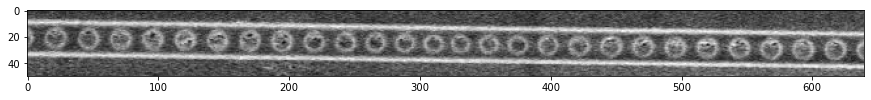

In [3]:
filename = "../images/a90l90__q003/a90l90__q003.jpg"

# Read image as grayscale, remove banner, crop, and normalize
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
no_banner = remove_banner(img, invert=True)[0]
no_banner = no_banner[200:250]
no_banner = no_banner / 255

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(no_banner, cmap="gray")

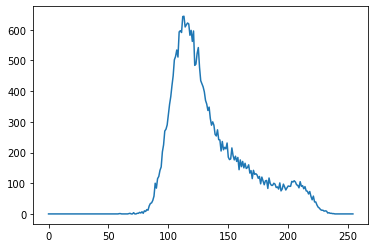

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
hist, bins = np.histogram(no_banner.ravel(), 256, [0, 1])
ax.plot(hist[1:])

Filter 1 - Power

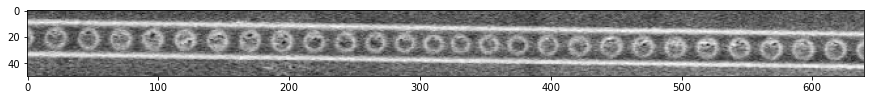

In [5]:
tmp = no_banner**(1/2)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(tmp, cmap="gray")

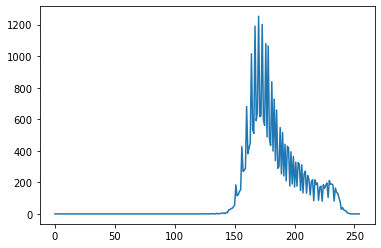

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
hist, bins = np.histogram(tmp.ravel(), 256, [0, 1])
ax.plot(hist[1:])

Filter 2 - Sigmoid

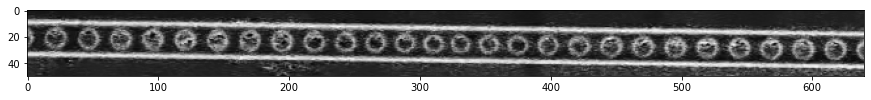

In [7]:
def sigmoid(x, k=1, x0=0):
    return 1 / (1 + np.exp(-k * (x - x0)))

tmp = sigmoid(no_banner, k=10, x0=no_banner.mean()) * no_banner
tmp = (tmp * 255).astype(np.uint8)
tmp = cv2.fastNlMeansDenoising(tmp, None, 10, 7, 21)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(tmp, cmap="gray")

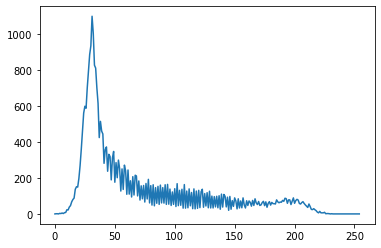

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
hist, bins = np.histogram(tmp, 256, [0, 255])
ax.plot(hist[1:])

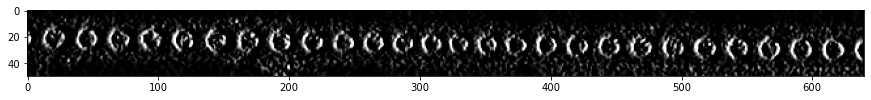

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(cv2.Sobel(tmp, cv2.CV_8U, 1, 0), cmap="gray")